In [15]:
import sys
sys.path.append("../")

import networkx as nx
from networkx import watts_strogatz_graph
import matplotlib.pyplot as plt
import numpy as np

from models.graph_permutation import graph_permutation
from torch_geometric.utils import to_dense_adj


[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


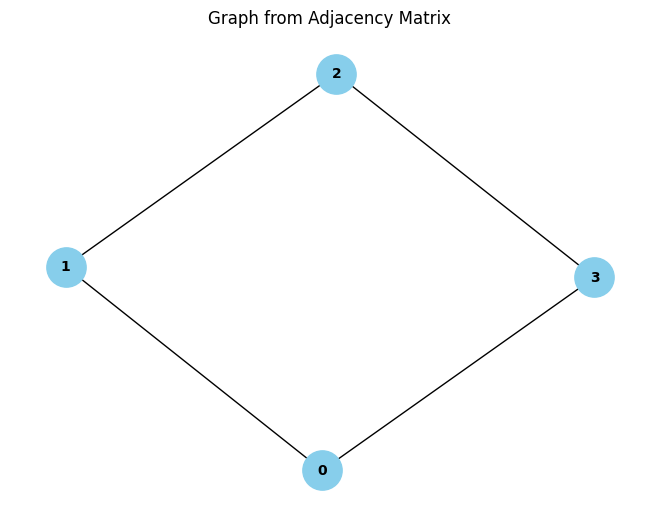

In [9]:
WS = watts_strogatz_graph(4, 2, 0.3, seed=None)

adjacency_matrix = nx.adjacency_matrix(WS).toarray()
print(adjacency_matrix)
# Plot the graph
pos = nx.spring_layout(WS)  # Define a layout for the nodes (spring_layout is just one example)
nx.draw(WS, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_color='black', font_weight='bold')
plt.title("Graph from Adjacency Matrix")
plt.show()

In [19]:
np.arange(4)

array([0, 1, 2, 3])

[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]
[[0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]]
[[0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]]


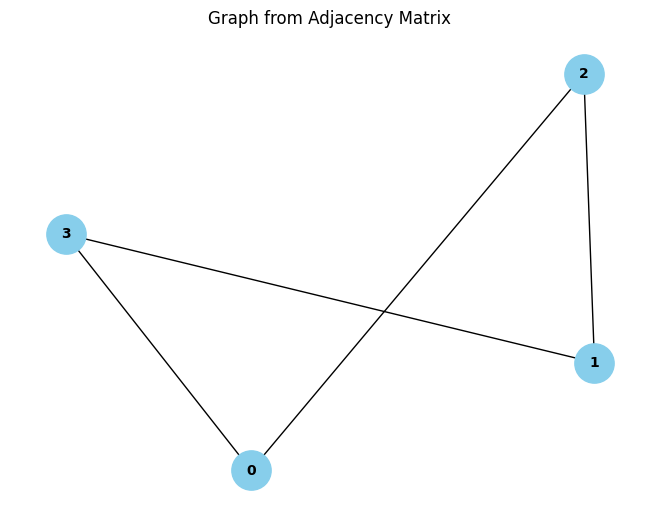

In [12]:
indexes = np.random.permutation([0,1,2,3])
A_new = adjacency_matrix.copy()
for i, index in enumerate(indexes):
    ## Rows
    old_row = A_new[i].copy()
    new_row = A_new[index].copy()
    A_new[i] = new_row
    A_new[index] = old_row

    ## Columns    
    old_col = A_new[:,i].copy()
    new_col = A_new[:,index].copy()
    A_new[:,i] = new_col
    A_new[:,index] = old_col

    print(A_new)

G_new = nx.Graph(A_new)

# Plot the graph
pos = nx.spring_layout(G_new)  # Define a layout for the nodes (spring_layout is just one example)
nx.draw(G_new, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_color='black', font_weight='bold')
plt.title("Graph from Adjacency Matrix")
plt.show()

In [13]:
from torch_geometric.utils.convert import from_networkx
edge_index_ = from_networkx(WS).edge_index

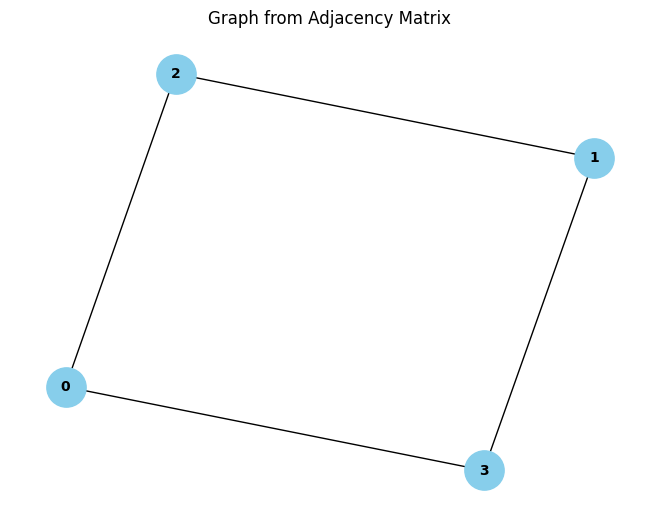

In [17]:
edge_index_new = graph_permutation(edge_index_, indexes)


A_new = to_dense_adj(edge_index_new).squeeze(0).numpy()


G_new = nx.Graph(A_new)

# Plot the graph
pos = nx.spring_layout(G_new)  # Define a layout for the nodes (spring_layout is just one example)
nx.draw(G_new, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_color='black', font_weight='bold')
plt.title("Graph from Adjacency Matrix")
plt.show()